# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Задания разминки ( 2 балла)

1) С помощью numpy и matplotlib нарисуйте косинусоиду `np.cos`, логарифм `np.log`, произведение синусоиды на логарифм `np.sin * np.log` и прямую на одном графике (без коэффициентов). Область определения $$x \in [0,10]$$
Возьмите 1000 точек для графика.

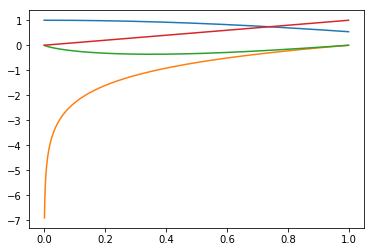

In [3]:
x = np.arange(0, 1, 0.001)
plt.plot(x, np.cos(x))
plt.plot(x[1:1000], np.log(x[1:1000]))
plt.plot(x[1:1000], np.sin(x[1:1000])*np.log(x[1:1000]))
plt.plot(x, x)

2) Нарисуйте scatter plot для двух семейств точек:
- первое семейство точек генерируйте из стандартного нормального распределения `np.random.randn` для обеих координат x и y
- второе семейтсов точек генерируйте из стандарнтого нормального распределения для координаты x и гамма распределения формы 4 `np.random.gamma` для координты y.

Должны получиться два облака точек разного цвета, которые можно мысленно разделить прямой с некоторой погрешностью.

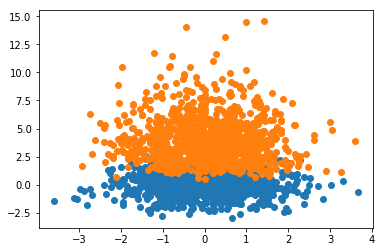

In [31]:
plt.scatter(np.random.randn(1000), np.random.randn(1000))
plt.scatter(np.random.randn(1000), np.random.gamma(shape=4, size=1000))

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Данные лежат в папке `2017-fall/data` https://github.com/7bits/ml-course-7bits/tree/master/2017-fall/data

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [4]:
!ls
df = pd.read_csv('data/bikes_rent.csv.gz', compression='gzip')

df.head()

adult.csv.gz
data
Homework_1.ipynb
titanic_train.csv
week04_homework_04-01-clustering-homework.ipynb
week04_workshop_04-01-clustering-workshop.ipynb
week2_homework_02-01-homework-numpy.ipynb
week2_homework_02-02-homework-pandas.ipynb
week2_workshop_02-01-workshop-numpy.ipynb
week2_workshop_02-02-workshop-pandas.ipynb
week3_homework_03-01-visualisation-homework.ipynb
week3_workshop_03-01-visualisation-workshop.ipynb
Workshop_1.ipynb


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
season            731 non-null int64
yr                731 non-null int64
mnth              731 non-null int64
holiday           731 non-null int64
weekday           731 non-null int64
workingday        731 non-null int64
weathersit        731 non-null int64
temp              731 non-null float64
atemp             731 non-null float64
hum               731 non-null float64
windspeed(mph)    731 non-null float64
windspeed(ms)     731 non-null float64
cnt               731 non-null int64
dtypes: float64(5), int64(8)
memory usage: 74.3 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

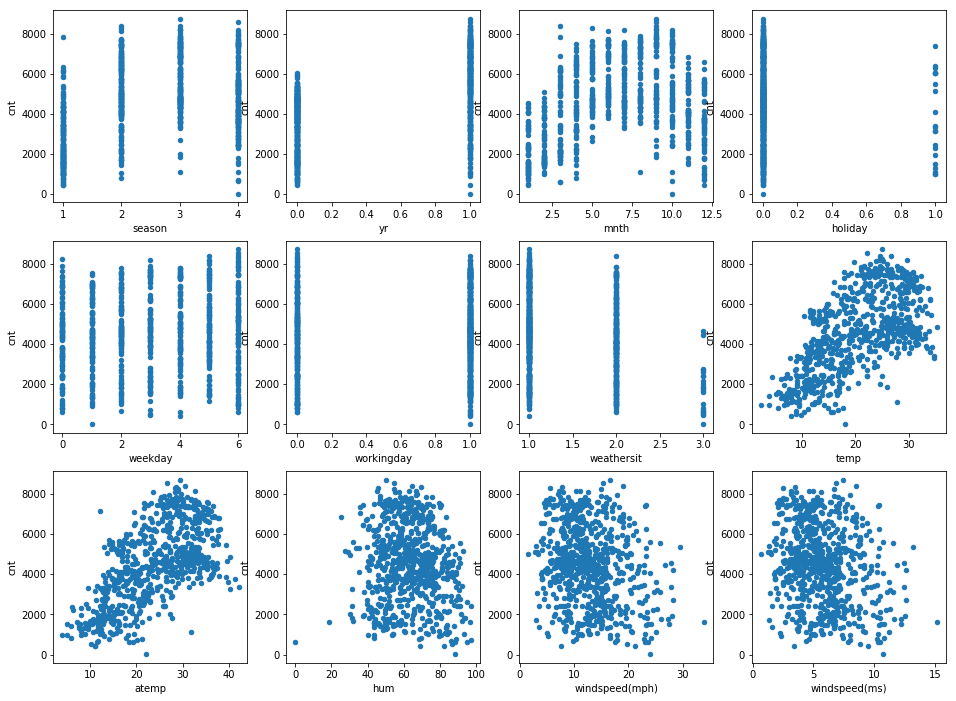

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы (каждый 1 балл):

#### Каков характер зависимости числа прокатов от месяца?

ответ: __*нелинейный, сходный с параболическим*__

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ: __*temp(температура в Цельсиях) и atemp(температура в Цельсиях по ощущениям)*__

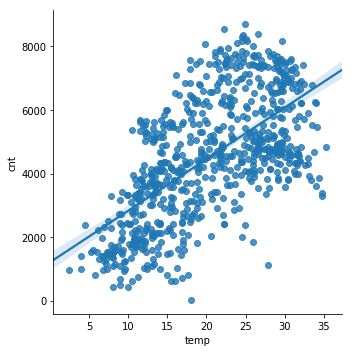

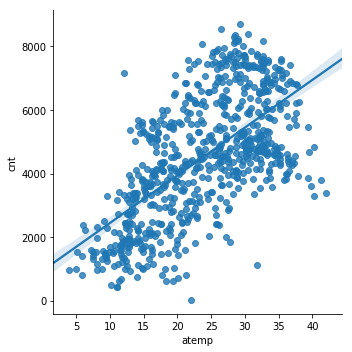

In [39]:
sns.lmplot(x="temp", y="cnt", data=df)
sns.lmplot(x="atemp", y="cnt", data=df)

## 2. Корреляционная матрица (2 балла)

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ: __*меньше всего с скоростью ветра м/c (windspeed (ms)), скоростью ветра миль/ч (windspeed (mph)), оценкой благоприятности погоды(wheathersit) и влажностью(hum), больше всего с самим количеством прокатов(count), температурой в Цельсиях (temp), температура в Цельсиях по ощущениям (atemp) и годом(yr)*__

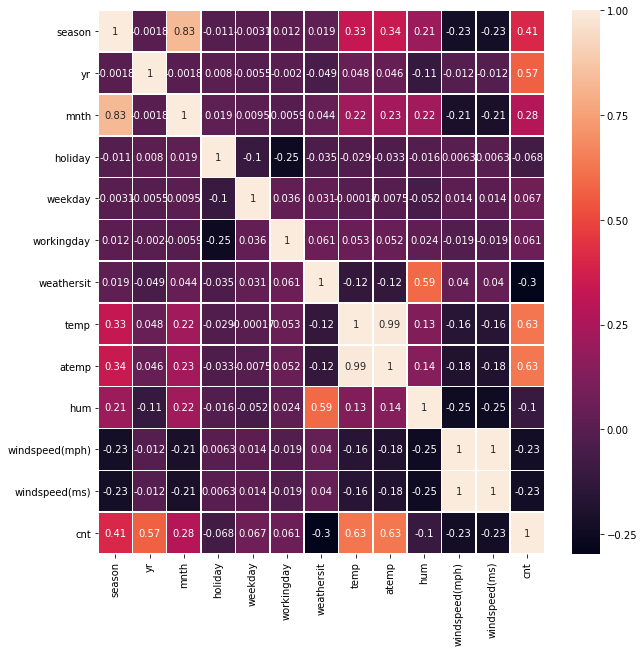

In [6]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

## 3. Barpot (2 балла)

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: __*на получившемся barplot видно, что число прокатов в каждом месяце года 1 значительно превосходит число прокатов в том же месяце для года 0, при этом 12 месяц года 0 и 1 месяц года 1 практически сопоставимы по числу прокатов. Это можно объяснить изначально малой известностью сервиса и постепенным ростом его популярности и соответственно числа прокатов в течение года 0*__

In [38]:
df.sum('cnt')

#sns.barplot(x=df['mnth'], y=df['cnt'].sum(),  hue=df['yr'])

ValueError: No axis named cnt for object type <class 'pandas.core.frame.DataFrame'>

## 4. Countplot (3 балла)

Постройте countplot диаграммы для признаков `weekday`, `weathersit`, 

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: 
    
Ответ: __*однородное распределение*__

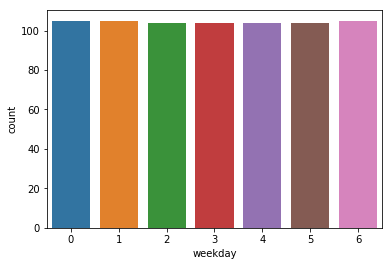

In [18]:
sns.countplot(df['weekday'])

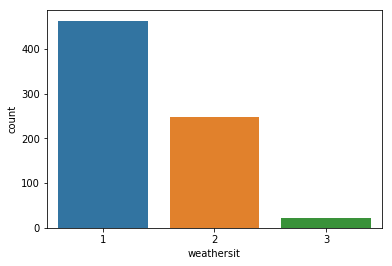

In [19]:
sns.countplot(df['weathersit'])

## 5. Распределение (3 балла)

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: __*~4500*__

Ответ: __*нормальное(гауссово) распределением*__

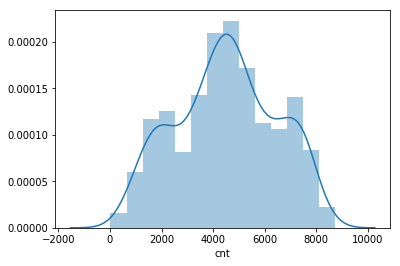

In [15]:
sns.distplot(df['cnt'])

## 6. Совместное распределение признаков (2 балла)

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: 

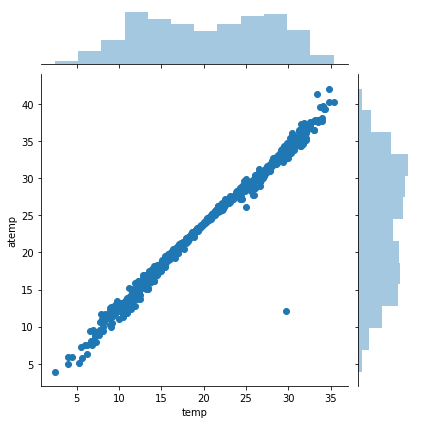

In [41]:
sns.jointplot(x=df['temp'], y=df['atemp'], data=df)

## 7. Ящик с усами (2 балла)

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ: 

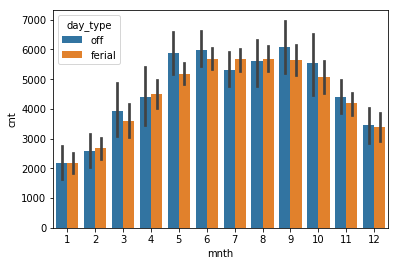

In [47]:
df1 = df
df1['day_type'] = np.where(df['weekday'] < 5, 'ferial', 'off')
sns.barplot(x=df1['mnth'], y=df1['cnt'],  hue=df['day_type'])

## 8. Хитрый вопрос (3 балла)

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение:

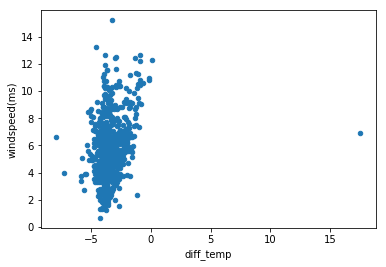

In [48]:
df2 = df
df2['diff_temp'] = df2['temp'] - df2['atemp']
df2.plot("diff_temp", "windspeed(ms)", kind="scatter")

In [49]:
df2

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt,day_type,diff_temp
0,1,0,1,0,6,0,2,14.110847,18.181250,80.5833,10.749882,4.805490,985,off,-4.070403
1,1,0,1,0,0,0,2,14.902598,17.686950,69.6087,16.652113,7.443949,801,ferial,-2.784352
2,1,0,1,0,1,1,1,8.050924,9.470250,43.7273,16.636703,7.437060,1349,ferial,-1.419326
3,1,0,1,0,2,1,1,8.200000,10.606100,59.0435,10.739832,4.800998,1562,ferial,-2.406100
4,1,0,1,0,3,1,1,9.305237,11.463500,43.6957,12.522300,5.597810,1600,ferial,-2.158263
5,1,0,1,0,4,1,1,8.378268,11.660450,51.8261,6.000868,2.682552,1606,ferial,-3.282182
6,1,0,1,0,5,1,2,8.057402,10.441950,49.8696,11.304642,5.053483,1510,off,-2.384548
7,1,0,1,0,6,0,2,6.765000,8.112700,53.5833,17.875868,7.991000,959,off,-1.347700
8,1,0,1,0,0,0,1,5.671653,5.808750,43.4167,24.250650,10.840702,822,ferial,-0.137097
9,1,0,1,0,1,1,1,6.184153,7.544400,48.2917,14.958889,6.687031,1321,ferial,-1.360247
